<a href="https://colab.research.google.com/github/Daria720/NM/blob/main/%D0%9B%D0%A010_%D0%93%D0%BE%D0%BC%D0%BE%D0%BD%D1%8E%D0%BA_%D0%94_5_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 10. Сплайни**

Була присутня на парі

In [4]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


#Варіант 1.
**Побудова кубічного сплайну.**

In [5]:

# Дані
x = np.array([0.2, 0.6, 1.1, 1.8, 2.6])
y = np.array([3.34, 4.53, 2.75, 3.91, 3.57])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 3.34 + 4.8254(x - 0.2) + 0.0(x - 0.2)^2 + -11.5652(x - 0.2)^3, x належить [0.2, 0.6]
Відрізок 2:
S_1(x) = 4.53 + -0.7259(x - 0.6) + -13.8783(x - 0.6)^2 + 16.42(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 3:
S_2(x) = 2.75 + -2.2891(x - 1.1) + 10.7517(x - 1.1)^2 + -7.306(x - 1.1)^3, x належить [1.1, 1.8]
Відрізок 4:
S_3(x) = 3.91 + 2.0235(x - 1.8) + -4.5909(x - 1.8)^2 + 1.9129(x - 1.8)^3, x належить [1.8, 2.6]


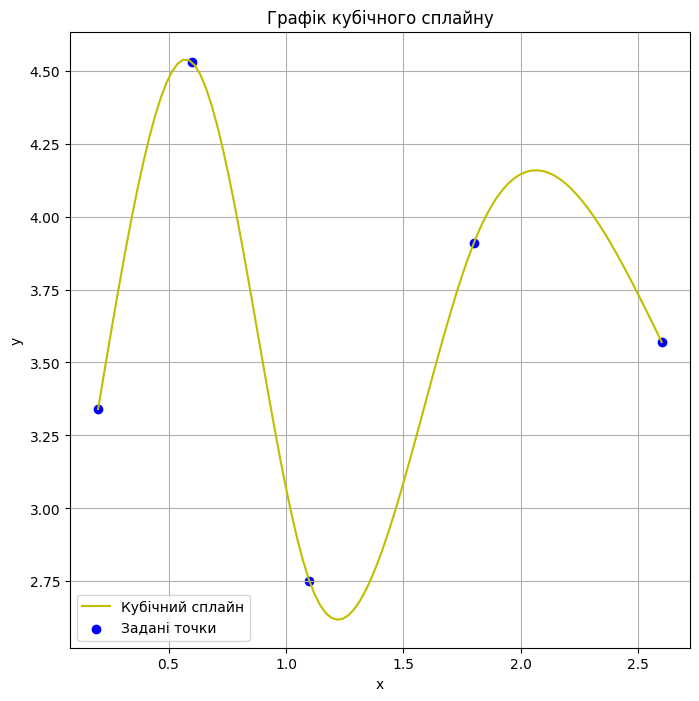

In [17]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = np.zeros_like(x_values)# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values[mask] = y_interval
# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='y')
plt.scatter(x, y, label="Задані точки", color='b')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік кубічного сплайну")
plt.legend(loc='lower left')
plt.grid()
plt.show()

#Варіант 2
**Перевірка за допомогою методу CubicSpline**

In [13]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.2, 0.6, 1.1, 1.8, 2.6])
y = np.array([3.34, 4.53, 2.75, 3.91, 3.57])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 11.2883*(x - 0.2)^3 + -21.9359*(x - 0.2)^2 + 9.9432*(x - 0.2) + 3.3400
S_2(x) = 11.2883*(x - 0.6)^3 + -8.3899*(x - 0.6)^2 + -2.1871*(x - 0.6) + 4.5300
S_3(x) = -4.5139*(x - 1.1)^3 + 8.5425*(x - 1.1)^2 + -2.1108*(x - 1.1) + 2.7500
S_4(x) = -4.5139*(x - 1.8)^3 + -0.9367*(x - 1.8)^2 + 3.2133*(x - 1.8) + 3.9100


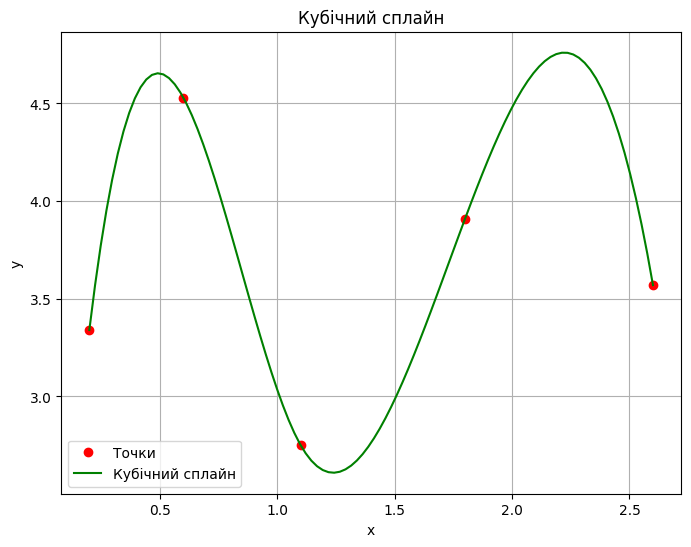

In [23]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#Варіант 3. Побудова сплайну



In [25]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        # Elimination
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    # Back substitution
    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

# Таблиця значень функції
x = np.array([0.2, 0.6, 1.1, 1.8, 2.6])
f = np.array([3.34, 4.53, 2.75, 3.91, 3.57])

d = len(x)

# Створюємо нульову матрицю А та нульовий вектор b
s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

# Відповідність сплайнів табличним значенням функції на лівих кінцях відрізків
for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

# Відповідність сплайнів табличним значенням функції на правих кінцях відрізків
for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

# Відповідність значень перших похідних сусідніх сплайнів
for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

# Відповідність значень других похідних сусідніх сплайнів
for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

# Крайові умови. Визначення нульових значень других похідних на кінцях відрізка
A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

# Обчислення коефіцієнтів сплайнів
c = gauss(A, b)

# Відображаємо сплайни
print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j+1]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

Сплайни
S_1(x) = 4.529999999999999-0.7258696529459225*(x-0.6)-13.87826119854721*(x-0.6)^2-11.565217665456009*(x-0.6)^3, на [0.2;0.6]
S_2(x) = 2.75-2.289130094834542*(x-1.1)+10.751740314769972*(x-1.1)^2+16.420001008878117*(x-1.1)^3, на [0.6;1.1]
S_3(x) = 3.91+2.0234705407586757*(x-1.8)-4.590882263922517*(x-1.8)^2-7.306010751758329*(x-1.8)^3, на [1.1;1.8]
S_4(x) = 3.57-1.6492352703793383*(x-2.6)+0.0*(x-2.6)^2+1.9128676099677153*(x-2.6)^3, на [1.8;2.6]


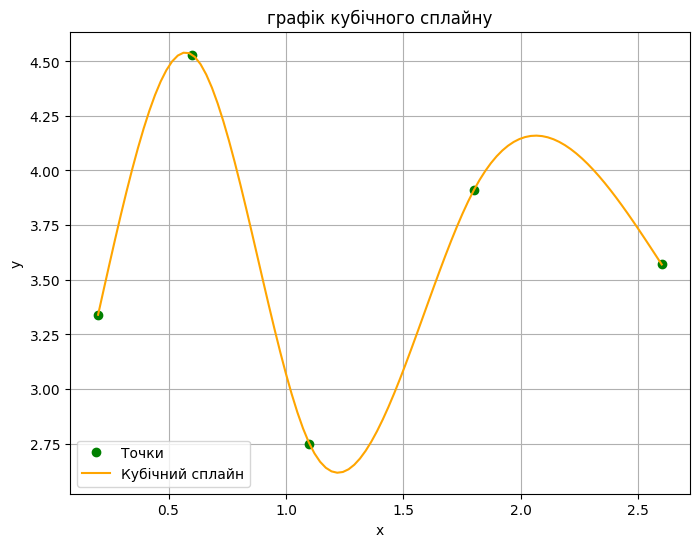

In [35]:
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = np.zeros_like(x_new)
n = len(x) - 1 # Кількість інтервалів

# Обчислення значень сплайна
for j in range(n):
    # Маска для точок x_new, що належать поточному інтервалу [x[j], x[j+1]]
    mask = (x_new >= x[j]) & (x_new <= x[j + 1])
    x_interval = x_new[mask]

    # h = x - x_{j+1} (відповідно до формули сплайна)
    h = x_interval - x[j+1]

    # Вибираємо коефіцієнти для j-го інтервалу (c[0+4j] до c[3+4j])
    c0 = c[0+4*j]
    c1 = c[1+4*j]
    c2 = c[2+4*j]
    c3 = c[3+4*j]

    # Формула сплайна S_j(x): c0 + c1*h + c2*h^2 + c3*h^3
    y_interval = c0 + c1 * h + c2 * (h ** 2) + c3 * (h ** 3)

    # Присвоєння обчислених значень y
    y_new[mask] = y_interval
# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'go', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('графік кубічного сплайну')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()